In [1]:
#import netCDF4 # import libraries
#from mpl_toolkits.basemap import Basemap
#from matplotlib.collections import LineCollection
#import matplotlib.pyplot as plt
#from matplotlib.colors import BoundaryNorm
#from matplotlib.ticker import MaxNLocator
#import numpy as np
#import pandas as pd
#import copy
#import sys
#import xarray as xr
#import seaborn as sns
#import sympy as sp
#import traceback
#import math
#import networkx as nx
#import itertools
#from itertools import product 
#from qiskit.quantum_info import Statevector
#from importlib import reload
##import utils.utils as ut
#import matplotlib.ticker as ticker
##import sklearn.preprocessing import StandardScaler
#
#RANDOM_SEED = 42
#np.random.seed(RANDOM_SEED)
##torch.manual_seed(RANDOM_SEED)

In [2]:
#import numpy as np
#from qiskit import Aer, IBMQ
#from qiskit.utils import QuantumInstance
#from qiskit.circuit import QuantumCircuit, ParameterVector
#from qiskit.opflow import StateFn, Z, I, CircuitSampler, Gradient, Hessian
#from qiskit.algorithms.optimizers import GradientDescent

### sort general_data provided

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('WomaniumChallenge.xlsx', sheet_name='General Data')
dataset.iloc[0:15,0:8]

,Qupermarket,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,2000m² Retail Space,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1500m² Parkong area,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3500m² Solar,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Opening Hours,8-22; Sunday closed,NaN,NaN,NaN,NaN,NaN
4,NaN,Energy Battery Space: 500kWh,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Energy Consumption and Production,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Consumption/m²/day,Consumption/day in kWh,Consumption/openinghour in kW,Consumption/closed hour in kW,NaN,NaN
7,NaN,NaN,0.86,1720,120,24,NaN,NaN
8,NaN,NaN,Production per day in kWh (March),Production(average) in kW,Night in kW,Rain in kW,Cloudy in kW,Sun in kW
9,NaN,NaN,1680,70,0,50,80,180


In [3]:
open_hour = 14
energy_space = 500
car_battery = 60
market_open = 120
market_close = 24

In [4]:
consumption = dataset.iloc[7:8,2:6]
new_header = dataset.iloc[6,2:6]
consumption.columns = new_header
consumption

6,Consumption/m²/day,Consumption/day in kWh,Consumption/openinghour in kW,Consumption/closed hour in kW
7,0.86,1720,120,24


In [5]:
production = dataset.iloc[9:10,2:8]
new_header = dataset.iloc[8,2:8]
production.columns = new_header
production

8,Production per day in kWh (March),Production(average) in kW,Night in kW,Rain in kW,Cloudy in kW,Sun in kW
9,1680,70,0,50,80,180


weather_data

In [6]:
Weather_data = pd.read_excel('WomaniumChallenge.xlsx', sheet_name='Weather Data')
Weather_data.head()

,Montag,Unnamed: 1,Dienstag,Unnamed: 3,Mittwoch,Unnamed: 5,Donnerstag,Unnamed: 7,Freitag,Unnamed: 9,Samstag,Unnamed: 11,Sonntag,Unnamed: 13
0,00:00:00,Night,00:00:00,Night,00:00:00,Night,00:00:00,Night,00:00:00,Night,00:00:00,Night,00:00:00,Night
1,00:30:00,Night,00:30:00,Night,00:30:00,Night,00:30:00,Night,00:30:00,Night,00:30:00,Night,00:30:00,Night
2,01:00:00,Night,01:00:00,Night,01:00:00,Night,01:00:00,Night,01:00:00,Night,01:00:00,Night,01:00:00,Night
3,01:30:00,Night,01:30:00,Night,01:30:00,Night,01:30:00,Night,01:30:00,Night,01:30:00,Night,01:30:00,Night
4,02:00:00,Night,02:00:00,Night,02:00:00,Night,02:00:00,Night,02:00:00,Night,02:00:00,Night,02:00:00,Night


In [7]:
monday_W    = Weather_data[Weather_data.columns[0:2]]   
tuesday_W   = Weather_data[Weather_data.columns[2:4]]
wednesday_W = Weather_data[Weather_data.columns[4:6]]
thursday_W  = Weather_data[Weather_data.columns[6:8]]
friday_W    = Weather_data[Weather_data.columns[8:10]]
saturday_W  = Weather_data[Weather_data.columns[10:12]]

car_data

In [8]:
Car_data = pd.read_excel('WomaniumChallenge.xlsx', sheet_name='Car Data')
Car_data.head()

,Car,Day,Arrival Time,Arrival Battery in %,Depature Time (End of Slot),Minimal Depature Battery in %
0,Mo1,Monday,08:00:00,92.0,08:00:00,53.0
1,Mo2,Monday,08:00:00,73.0,08:30:00,42.0
2,Mo3,Monday,08:00:00,73.0,09:00:00,67.0
3,Mo4,Monday,08:00:00,85.0,08:00:00,14.0
4,Mo5,Monday,08:00:00,86.0,08:00:00,76.0


In [9]:
monday    = Car_data.iloc[0:127]
tuesday   = Car_data.iloc[128:243]
wednesday = Car_data.iloc[244:365]
thursday  = Car_data.iloc[367:477]
friday    = Car_data.iloc[478:588]
saturday  = Car_data.iloc[589:793]

In [10]:
Plug = 420
discharging = 84
charging = -84
SPS = 0

In [11]:
monday_W.iloc[1:17]["Montag"]

1     00:30:00
2     01:00:00
3     01:30:00
4     02:00:00
5     02:30:00
6     03:00:00
7     03:30:00
8     04:00:00
9     04:30:00
10    05:00:00
11    05:30:00
12    06:00:00
13    06:30:00
14    07:00:00
15    07:30:00
16    08:00:00
Name: Montag, dtype: object

In [12]:
from util import closing_consumption
ctw_list= list(monday_W.iloc[1:17]["Unnamed: 1"])
print(closing_consumption(csh= len(ctw_list)/2,ctw_list = ctw_list))
#negative which mean no consumption, can store 48kW to shop battery capacity

sum_closing_shop_hour 192.0 closing_total_weather_kW 240
-48.0


In [40]:
for i in list(monday_W.iloc[1:17]["Unnamed: 1"]):
    print(i)

Night
Night
Night
Night
Night
Night
Night
Night
Night
Night
Night
Night
Night
Cloudy
Cloudy
Cloudy


Cost function:
\begin{equation}
f = \sum_{}^{} (C_{plug} + C_{Electric Vehicle (discharging)}+ C_{Electric Vehicle (charging)} + C_{Solar Power System}),   
\end{equation}
C_{plug} = CO_2 emission by eletricity from plug,   
C_{Electric Vehicle (discharging)} = CO_2 emission by electricity through discharging,   
C_{Electric Vehicle (charging)} = CO_2 emission by charging vehicles,   
C_{Solar Power System} = CO_2 emission by using solar power system,   

## Target 
### First method(which include most complicated situation, but cost more binary_variable)
qubit cost = 50+ - 60+  
the idea is from knapsnake  
for each half an hour  
when mintime is bigger than 0:  
for each car(i)  
total battery charge(tbc) = 
\begin{equation}
\pm tbc = (\pm minbattery*(\frac{(mintime*\frac{batterycapacity}{fullchargetime})}{\pm minbattery})
\end{equation}
when minbattery positive,choose charge or plug:  
\begin{equation}
f_{charge_{i}}= (x_{i}*+tbc_{i})*dischargingcost    
\end{equation}
\begin{equation}
f_{plug_{i}}= ((x_{i}-1)^{2}*+tbc_{i})*plugcost  
\end{equation}


when minbattery negetive, choose discharge or not discharge for extra storage for future:
\begin{equation}
f_{discharge_{i}} = (y_{i}*-tbc_{i}*pd_{i})*chargecost
\end{equation}
pd = percentage boundary 0 <= per <= 1 

\begin{equation}
f_{future_{i}} = z_{i} * fc*(1 - \frac{fc-(-tbc*(100 - pd{i}))}{fc})*chargecost
\end{equation}
fc = future consumption

Minimize:  
\begin{equation}
\min_{x,y,z\in\{0,1\}^n}\sum_{i}^{}f_{charge_{i}} + \sum_{i}^{}f_{plug_{i}} + \sum_{i}^{}f_{discharge_{i}} + \sum_{i}^{}f_{future_{i}}
\end{equation}

Subject to:

\begin{equation}
\sum_{i}^{}(x_{i}*+tbc_{i}) + (y_{i}*-tbc_{i}) <= sbc
\end{equation}

\begin{equation}
\sum_{i}^{}z_{i}(-tbc_{i}*(100 - pd_{i}))<=fc
\end{equation}

\begin{equation}
\sum_{i}^{}z_{i}(-tbc_{i}*(100 - pd_{i})) <= sbc_{limit}
\end{equation}
- fp = future production,
sbc = supermarket battery capacity


- x,y,z = 1/0 for choose  
- [ ] minbattery = (minimal departure battery - arrival battery)* car battery capacity, how much car capacity have
- [ ] if mintime > 30 and ((minbattery/ charging rate per minute)-30) > 0, then saving_minbattery = (((minbattery/ charging rate per minute)-30)*charging rate per minute) for include in the next loop,and current minbattery = minbattery - saving minbattery, so I know what if the car need to charge over 30 minute
- [ ] if tbc percentage > 1(so I know it need lesser time to charge), then mintime = (minbattery/ charging rate per minute)  
and if mintime > 30(check if there is duplicate time line),  sbc_limit = sbc_limit + ((mintime*batteryrateperminute) - minbattery), so I can use it to store more energy, so sbc_limit need to recalculate when the car left.(remind: this type of algorithm wont work in contineuous stituation with different charging rate because it didn't include the charging rate constraints to sbc_limit)
- [ ] mintime = departure time - arrival time
- [ ] so we don't need the probabilty variable, pd = (total_-tbc/number of car)/-tbc_i, all should smaller than 1, seperate the battery to other car that has space for that.
- [ ] positive, cost = plug_co2 or discharging_co2(which (x-1)^2 for choosing), else cost = charge_co2

feel free to make a latex equation(so actually this is also allow to include into the quadratic equation or adiabatic, for increase scale, but here we want to scale down so we prepare the initial data oursevles)
- [ ] closing_consumption = closing_shop_consumption - closing_total_weather_kW(production); so sbc = sbc - closing_consumption  
- [ ] open_consumption = (sum of total_battery_charge + opening_hour_consumption) - opening_weather_kW(production)
- [ ] future consumption =  open_consumption + closing_consumption
- [ ] sbc = closing_total_weather_kW + open_weather_kW


when minbattery positive,choose charge or plug:  
- for charge only, total battery charge <= supermarket battery capacity - previous car total battery charge
- both, total battery charge = minimal departure battery  

when minbattery negetive, choose discharge or not discharge for extra storage for future:
- supermarket battery capacity <= overall future consumption;
- supermarket battery capacity <= limit of supermarket battery capacity

solar power should grow automatic in this model

something need to showcase also:  
- number of qubit = 1 + 2*(variable_number-1)  
- so we need to show if we can ignore the f_future and f_discharge, use less qubit

### second method for knapsack(normal knapsack, need far less qubit, but can't handle more complicated situation and is not the optimal solution) 
qubit cost= around 20+ qubit  
when minbattery positive,choose charge or plug:  
\begin{equation}
f_{charge_{i}}= (x_{i}*+tbc_{i})*dischargingcost    
\end{equation}
\begin{equation}
f_{plug_{i}}= ((x_{i}-1)^{2}*+tbc_{i})*plugcost  
\end{equation}

Minimize:  
\begin{equation}
\min_{x\in\{0,1\}^n}\sum_{i}^{}f_{charge_{i}} + \sum_{i}^{}f_{plug_{i}}
\end{equation}
Subject to:

\begin{equation}
\sum_{i}^{}(x_{i}*+tbc_{i}) <= sbc + totalminustbc
\end{equation}
- fp = future production,
sbc = supermarket battery capacity

- [ ] calculate the future saving out.

### third method: dont need knapsack, not even need quantum speed up
doing simple math with logic,  
- ((sbc + -tbc) - +tbc)  
if it is positive, sbc <= sbc_limit for next loop.  
if it is negative, use plug.  
- other similar condition

qiskit-optimization tutorial: https://github.com/Qiskit/qiskit-optimization/tree/main/docs/tutorials

example approch:

introduction to qiskit-optimizer:https://medium.com/qiskit/towards-quantum-advantage-for-optimization-with-qiskit-9a564339ef26
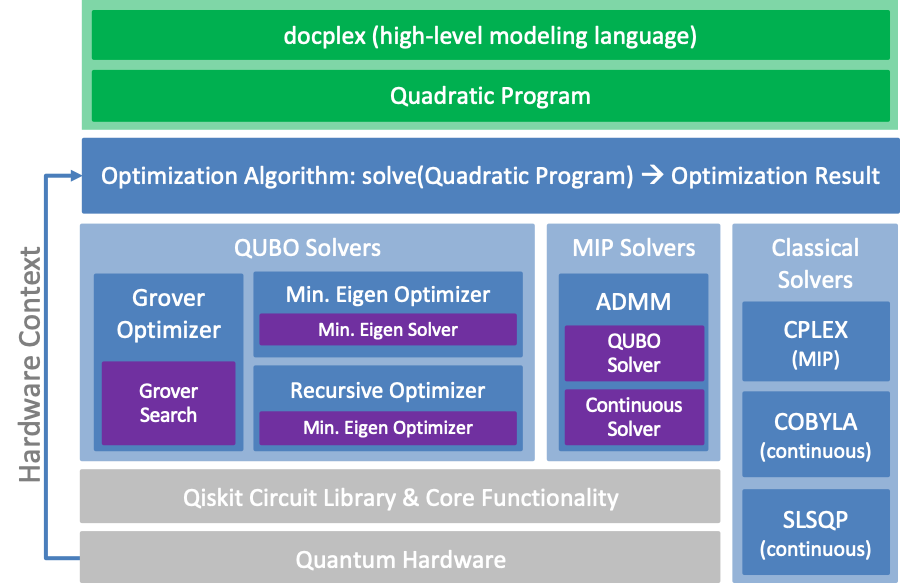

1. loop for quadratic program
2. qaoa & qiskit_runtime
3. classical solution
4. presentation

In [1]:
import util

In [2]:
util.minbattery
util.mintime
util.closing_consumption

<function util.closing_consumption(csc: int = None, ctw: int = None) -> int>

### first method: predefine the probability, only if every car is the same

In [1]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
import numpy as np

In [105]:
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp

# construct model using docplex
mdl = Model("cost function")

v = mdl.binary_var(name="x")
w = mdl.binary_var(name="y")
#w=1
#t = mdl.binary_var(name="z")
t=1
u=0.3

mdl.minimize(v + w + t + 5 * (u - 2) ** 2)
mdl.add_constraint(v + 2 * w + t + u <= 3, "sbc")
#mdl.add_constraint(v + w + t <= 1, "fc")
#mdl.add_constraint(v + w <= 1, "sbc_limit")

# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.prettyprint())

Problem name: cost function

Minimize
  x + y + 15.45

Subject to
  Linear constraints (2)
    x + 2*y <= 1.7  'sbc'
    x + y <= 1  'sbc_limit'

  Binary variables (2)
    x y



In [106]:
from qiskit_optimization.converters import QuadraticProgramToQubo
conv = QuadraticProgramToQubo()
qubo_model = conv.convert(qp)
ising = qubo_model.to_ising()
ising_matrix = ising[0].to_matrix()

The value could be too small. If so, set the penalty coefficient manually.


In [107]:
import dimod
print(ising)
print(qubo_model)
print(ising_matrix)

linear_array = qubo_model.objective.linear.to_dict()
quadratic_array = qubo_model.objective.quadratic.to_dict()
offset = qubo_model.objective.constant
bqm = dimod.BinaryQuadraticModel(linear_array, quadratic_array, offset, dimod.BINARY)
print(bqm.to_polystring())
print(bqm.to_ising())

(PauliSumOp(SparsePauliOp(['IIZ', 'IZI', 'ZII', 'IZZ', 'ZIZ', 'ZZI'],
              coeffs=[-125003.5+0.j, -225006.5+0.j, -100003. +0.j,  125003. +0.j,   50001.5+0.j,
  100003. +0.j]), coeff=1.0), 275023.95)
minimize 100003*sbc@int_slack@0^2 + 200006*x*sbc@int_slack@0 + 100003*x^2 + 500012*x*y + 400012*y*sbc@int_slack@0 + 400012*y^2 - 200006*sbc@int_slack@0 - 200005*x - 400011*y + 100018.45 (3 variables, 0 constraints, 'cost function')
[[-175005.5+0.j       0. +0.j       0. +0.j       0. +0.j       0. +0.j
        0. +0.j       0. +0.j       0. +0.j]
 [      0. +0.j -275007.5+0.j       0. +0.j       0. +0.j       0. +0.j
        0. +0.j       0. +0.j       0. +0.j]
 [      0. +0.j       0. +0.j -175004.5+0.j       0. +0.j       0. +0.j
        0. +0.j       0. +0.j       0. +0.j]
 [      0. +0.j       0. +0.j       0. +0.j  225005.5+0.j       0. +0.j
        0. +0.j       0. +0.j       0. +0.j]
 [      0. +0.j       0. +0.j       0. +0.j       0. +0.j -275008.5+0.j
        0. +0.j     

3


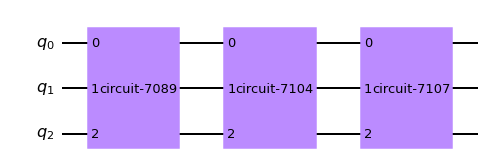

In [108]:
circuit =ising[0].exp_i().to_circuit().decompose(reps=0)
print(circuit.depth())
circuit.draw('mpl')

classical optimizer

In [15]:
meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
#print('\n index of the chosen items:', prob.interpret(result)) 

The value could be too small. If so, set the penalty coefficient manually.


result:
 fval=14.45, x=0.0, y=0.0, z=0.0, status=SUCCESS


quantum optimizer

In [40]:
# QAOA
seed = 123
algorithm_globals.random_seed = seed
qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, seed_simulator=seed, seed_transpiler=seed)

meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(qp)
print('result:\n', result)
#print('\n index of the chosen items:', prob.interpret(result)) 

The value could be too small. If so, set the penalty coefficient manually.


result:
 fval=14.45, x=0.0, y=0.0, z=0.0, status=SUCCESS


###  second method: real application version, will deal with different car variable with different co2 cost, it will take much longer to run

In [17]:
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp

# construct model using docplex
mdl = Model("cost function")

v = mdl.binary_var(name="x")
w = mdl.binary_var(name="y")
t = mdl.binary_var(name="z")
u = mdl.continuous_var(lb=0, ub=1,name="p")

mdl.minimize(v + w + t + 5 * (u - 2) ** 2)
mdl.add_constraint(v + 2 * w + t + u <= 3, "sbc")
mdl.add_constraint(v + w + t <= 1, "fc")
mdl.add_constraint(v + w <= 1, "sbc_limit")

# load quadratic program from docplex model
qp = from_docplex_mp(mdl)
print(qp.prettyprint())

Problem name: cost function

Minimize
  5*p^2 - 20*p + x + y + z + 20

Subject to
  Linear constraints (3)
    p + x + 2*y + z <= 3  'sbc'
    x + y + z <= 1  'fc'
    x + y <= 1  'sbc_limit'

  Continuous variables (1)
    0 <= p <= 1

  Binary variables (3)
    x y z



from: https://qiskit.org/documentation/optimization/tutorials/05_admm_optimizer.html

quantum and classical contineuous optimizer

In [18]:
from qiskit_optimization.algorithms import CobylaOptimizer, MinimumEigenOptimizer,SlsqpOptimizer
from qiskit import BasicAer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit_optimization.algorithms.admm_optimizer import ADMMParameters, ADMMOptimizer

admm_params = ADMMParameters(
    rho_initial=1001, beta=1000, factor_c=900, maxiter=100, three_block=True, tol=1.0e-6)


In [19]:
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())#classical solver
qaoa = MinimumEigenOptimizer(QAOA(quantum_instance=BasicAer.get_backend("statevector_simulator")))#quantum solver
cobyla = CobylaOptimizer()

In [20]:
# define continuous_optimizer
continuous_optimizer = qaoa
# continuous_optimizer = cplex  # uncomment to use CPLEX instead

# define classical optimizer
convex_optimizer = CobylaOptimizer()
# convex_optimizer = cplex  # uncomment to use CPLEX instead

# initialize ADMM with classical QUBO and convex optimizer
admm = ADMMOptimizer(
    params=admm_params, qubo_optimizer=continuous_optimizer, continuous_optimizer=convex_optimizer)


In [21]:
# run ADMM to solve problem
result = admm.solve(qp)


In [22]:
print(result.prettyprint())

objective function value: 4.999999999999998
variable values: x=0.0, y=0.0, z=0.0, p=1.0000000000000002
status: INFEASIBLE


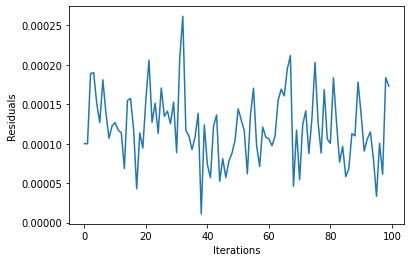

In [23]:
import matplotlib.pyplot as plt
plt.plot(result.state.residuals)
plt.xlabel("Iterations")
plt.ylabel("Residuals")
plt.show()

classical optimizer

In [24]:
from qiskit_optimization.algorithms import CplexOptimizer, GurobiOptimizer

cplex_result = CplexOptimizer().solve(qp)
gurobi_result = GurobiOptimizer().solve(qp)

print("cplex")
print(cplex_result)
print()
print("gurobi")
print(gurobi_result)

Restricted license - for non-production use only - expires 2023-10-25
cplex
fval=5.0, x=0.0, y=0.0, z=0.0, p=1.0, status=SUCCESS

gurobi
fval=5.0, x=0.0, y=0.0, z=0.0, p=1.0, status=SUCCESS


In [25]:
result = CplexOptimizer(disp=True, cplex_parameters={"threads": 1, "timelimit": 0.1}).solve(qp)
print(result)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Threads                                 1
CPXPARAM_TimeLimit                               0.10000000000000001
Found incumbent of value 20.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 3 rows and 4 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.02 sec. (0.00 ticks)
Sequential b&c:
  Real time             =    0.00 sec. (0.00 ticks)
                          ------------
Total (root+branch&cut) =    0.02 sec. (0.00 ticks)
fval=5.0, x=0.0, y=0.0, z=0.0, p=1.0, status=SUCCESS


## possible further extend:
- possibility for adiabatic for noiseless QC
- can scale up to running all data or equation at once
- make change how to prepare the initial data to make it useful to continuous situation, like different battery capacity, charging rate, and arrival time.